This script is used to create the illustrative plots using modeled and simulated DIN loads

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import os

In [66]:
# common settings
lab_fontsize = 13
fig_dir = '../output/figs/'

In [ ]:
## Read model simulations and calculate the normalized value
dir = '../output/DailyData_run_till_2017_20241125/'
mod_fn_list = os.listdir(dir)
mod_fn_list = [fn for fn in mod_fn_list if '_' in fn]
flow_col = 'Q (m3/s)'; din_load_col = 'Load (t)'
mod_flow_load = pd.read_csv(dir + mod_fn_list[0]).rename(columns={'Unnamed: 0': 'date'}).set_index('date')
mod_flow_load = mod_flow_load[mod_flow_load.index <= '2018-06-30']
mod_flow_load.index = pd.to_datetime(mod_flow_load.index)

dir_measunc = 'code for measurement uncertainty/output/resample_freq100_new_assumption/'
obs_daily_ensmb_fn = 'dailyloadunc.csv'
obs_daily_ensmb = pd.read_csv(dir_measunc + obs_daily_ensmb_fn, header=None, index_col=0)
obs_daily_ensmb.index.name = 'date'
obs_daily_ensmb.index = pd.to_datetime(obs_daily_ensmb.index)

## Generate Cumulative Plot

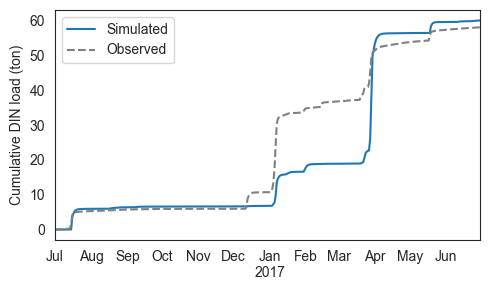

In [114]:
# Plot cumulative plot
fig = sns.set_style('white')
ax = mod_flow_load.loc['2016-07-01':'2017-06-30', din_load_col].cumsum().plot(label  = 'Simulated', figsize=(5, 3))
obs_daily_ensmb.loc['2016-07-01':'2017-06-30', 1].cumsum().plot(ax=ax, label  = 'Observed', color = 'grey', ls = '--')
plt.legend()
plt.ylabel('Cumulative DIN load (ton)')
plt.xlabel('')
plt.tight_layout()
plt.savefig(f'{fig_dir}Illustrative plot/cumulative_plot.png', dpi=300)

# Generate Load Duration Curve

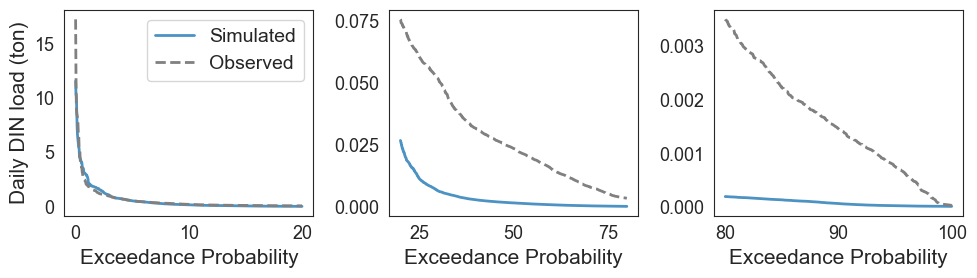

In [123]:
# Plot load duration curve
selected_time_period = ['2009-07-01', '2017-06-30']
sorted_mod_load = mod_flow_load.loc[selected_time_period[0]:selected_time_period[1], din_load_col].sort_values(ascending=False).reset_index()
sorted_mod_load['Exceedance Probability'] = 100 * (sorted_mod_load.index / len(sorted_mod_load))
# ax = plt.plot(mod_percentage, sorted_mod_load[din_load_col], label = 'Simulated')
# 定义分段
sorted_mod_load['Segment'] = pd.cut(sorted_mod_load['Exceedance Probability'], 
                      bins=[0, 20, 80, 100],
                      labels=['Peak (0-20%)', 'Intermediate (20-80%)', 'Base (80-100%)'])

# Process observed data
sorted_obs_load = obs_daily_ensmb.loc[selected_time_period[0]:selected_time_period[1], 1].sort_values(ascending=False).reset_index()
sorted_obs_load['Exceedance Probability'] = 100 * (sorted_obs_load.index / len(sorted_obs_load))
# ax = plt.plot(mod_percentage, sorted_mod_load[din_load_col], label = 'Simulated')
# 定义分段
sorted_obs_load['Segment'] = pd.cut(sorted_obs_load['Exceedance Probability'], 
                      bins=[0, 20, 80, 100],
                      labels=['Peak (0-20%)', 'Intermediate (20-80%)', 'Base (80-100%)'])
# 绘制分段图表
fig, axes = plt.subplots(nrows = 1, ncols=3, figsize=(10, 3))
# 设置全局字体大小
plt.rcParams.update({
    'font.size': 14,               # 控制默认文本大小
    'axes.titlesize': 16,          # 坐标轴标题大小
    'axes.labelsize': 16,          # 坐标轴标签大小
    'xtick.labelsize': 16,         # x轴刻度标签大小
    'ytick.labelsize': 16,         # y轴刻度标签大小
    'legend.fontsize': 14,         # 图例字体大小
    'figure.titlesize': 18         # 图形总标题大小
})
sns.set_style("white")
# Plot data with percentage <= 20%
sns.lineplot(data = sorted_mod_load[sorted_mod_load['Segment'] == 'Peak (0-20%)'], x = 'Exceedance Probability', 
             y = din_load_col, label = 'Simulated', ax = axes[0], linewidth = 2, alpha = 0.8)
sns.lineplot(data = sorted_obs_load[sorted_obs_load['Segment'] == 'Peak (0-20%)'], x = 'Exceedance Probability', 
             y = 1, label = 'Observed', ax = axes[0], color = 'grey', ls = '--', linewidth = 2)
# Plot data with 20% <percentage <= 80%
sns.lineplot(data = sorted_mod_load[sorted_mod_load['Segment'] == 'Intermediate (20-80%)'], 
             x = 'Exceedance Probability', y = din_load_col, ax = axes[1], linewidth = 2, alpha = 0.8)
sns.lineplot(data = sorted_obs_load[sorted_obs_load['Segment'] == 'Intermediate (20-80%)'], 
             x = 'Exceedance Probability', y = 1, ax = axes[1], color = 'grey', ls = '--', linewidth = 2)
# Plot data with 80% <percentage
sns.lineplot(data = sorted_mod_load[sorted_mod_load['Segment'] == 'Base (80-100%)'], 
             x = 'Exceedance Probability', y = din_load_col, ax = axes[2], linewidth = 2, alpha = 0.8)
sns.lineplot(data = sorted_obs_load[sorted_obs_load['Segment'] == 'Base (80-100%)'], 
             x = 'Exceedance Probability', y = 1, ax = axes[2], color = 'grey', ls = '--', linewidth = 2)
axes[0].set_ylabel('Daily DIN load (ton)')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

plt.tight_layout()
plt.savefig(f'{fig_dir}Illustrative plot/load_duration_curve.png', dpi=300)